In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 시간 측정을 위한 시간 모듈
import datetime
# 주식 정보를 읽어오기 위한 라이브러리
from pandas_datareader import data

### 맛집 데이터 불러오기

In [2]:
# 데이터 로딩
matzip = pd.read_csv("data/matzipData.csv")
matzip

,Restaurant Name,Rating,Address,Tel,Food,Price,Parking,Operating Time,Holiday
0,이나니와요스케,4.4,서울시 중구 을지로1가 192-11,02-772-9994,라멘 / 소바 / 우동,만원-2만원,주차공간없음,11:00 - 23:00,일
1,바오차이,4.4,서울시 중구 을지로2가 203,02-6031-0107,정통 중식 / 일반 중식,2만원-3만원,유료주차 가능,11:30 - 21:30,NaN
2,라칸티나,4.4,서울시 중구 을지로1가 50,02-777-2579,이탈리안,3만원-4만원,NaN,월-토: 11:30 - 23:00 일: 17:30 - 23:00,NaN
3,라세느,4.3,서울시 중구 소공동 1,02-317-7171,뷔페,4만원 이상,발렛,06:00 - 22:00,NaN
4,산수갑산,4.3,서울시 중구 인현동1가 15-4,02-2275-6654,탕 / 찌개 / 전골,만원 미만,유료주차 가능,월-금: 11:30 - 22:00 토: 11:30 - 20:00,일
...,...,...,...,...,...,...,...,...,...
395,누룩나무,4,서울시 종로구 관훈동 118-19,02-722-3398,전통 주점 / 포차,만원-2만원,주차공간없음,17:00 - 01:30,일
396,옴,4,서울시 종로구 신문로1가 2,02-723-4848,인도 음식,만원-2만원,주차공간없음,11:00 - 22:00,NaN
397,코블러,4,서울시 종로구 내자동 157,02-733-6421,칵테일 / 와인,만원-2만원,유료주차 가능,19:00 - 03:00,일
398,클류치,4,서울시 종로구 명륜3가 79-1,010-2702-1496,카페 / 디저트,만원 미만,주차공간없음,월-토: 10:00 - 23:00 일: 11:00 - 20:00,NaN


### 맛집 데이터 처리

In [3]:
# 정보 확인
matzip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Restaurant Name  400 non-null    object
 1   Rating           400 non-null    object
 2   Address          400 non-null    object
 3   Tel              350 non-null    object
 4   Food             400 non-null    object
 5   Price            397 non-null    object
 6   Parking          329 non-null    object
 7   Operating Time   364 non-null    object
 8   Holiday          126 non-null    object
dtypes: object(9)
memory usage: 28.2+ KB


In [4]:
# 결측치 확인
matzip.isna().sum()

Restaurant Name      0
Rating               0
Address              0
Tel                 50
Food                 0
Price                3
Parking             71
Operating Time      36
Holiday            274
dtype: int64

### 결측치 처리

- 휴일에 대한 결측치 처리해볼까요?

In [5]:
# 휴일 구조 파악
matzip["Holiday"].value_counts()

일                     75
월                     21
토, 일                   7
화                      3
일, 첫째 월                2
일, 월                   2
둘째/넷째 일                2
수                      2
월, 화                   2
토                      1
토-일                    1
월, 셋째 화                1
월, 마지막 화               1
첫째, 셋째 월, 둘째, 넷째 일     1
첫째/셋째 일                1
넷째 일, 월                1
둘째, 넷째 일               1
월, 일                   1
격주 월                   1
Name: Holiday, dtype: int64

In [6]:
# 휴일에 결측치인 곳은 연중무휴로 설정한다.
matzip["Holiday"].fillna("연중무휴", inplace=True)
matzip.isna().sum()

Restaurant Name     0
Rating              0
Address             0
Tel                50
Food                0
Price               3
Parking            71
Operating Time     36
Holiday             0
dtype: int64

In [7]:
matzip["Holiday"].value_counts()

연중무휴                  274
일                      75
월                      21
토, 일                    7
화                       3
일, 월                    2
둘째/넷째 일                 2
수                       2
일, 첫째 월                 2
월, 화                    2
월, 셋째 화                 1
토                       1
토-일                     1
첫째, 셋째 월, 둘째, 넷째 일      1
월, 마지막 화                1
첫째/셋째 일                 1
넷째 일, 월                 1
둘째, 넷째 일                1
월, 일                    1
격주 월                    1
Name: Holiday, dtype: int64

- 가격에 대한 결측치 처리 해봅시다~~@!!!!!!~!~!~!!!!

In [8]:
# 가격 데이터 확인
matzip["Price"].value_counts()

만원-2만원     161
만원 미만      159
2만원-3만원     46
4만원 이상      22
3만원-4만원      9
Name: Price, dtype: int64

In [9]:
# 결측치를 확인해봅시다.
matzip["Price"].isna().sum()

3

In [31]:
# 결측치를 10000을호 채운다.
# 채운 이유 ? 그냥 10000원으로 정했습니다.
matzip_price = matzip["Price"].fillna("10000")
matzip_price

0       만원-2만원
1      2만원-3만원
2      3만원-4만원
3       4만원 이상
4        만원 미만
        ...   
395     만원-2만원
396     만원-2만원
397     만원-2만원
398      만원 미만
399      만원 미만
Name: Price, Length: 400, dtype: object

In [26]:
# 결측치 확인
matzip_price.isna().sum()

0

In [27]:
# 저장되어 있는 값 확인
matzip_price.value_counts()

만원-2만원     161
만원 미만      159
2만원-3만원     46
4만원 이상      22
3만원-4만원      9
10000        3
Name: Price, dtype: int64

In [32]:
# 값을 변경한다.
# 만원이라는 글자를 10000 으로 변경한다.
matzip_price = matzip_price.str.replace("만원", "10000")
# 210000 글자를 20000 으로 변경한다.
matzip_price = matzip_price.str.replace("210000", "20000")
# 310000 글자를 30000 으로 변경한다.
matzip_price = matzip_price.str.replace("310000", "30000")
# 410000 글자를 40000 으로 변경한다.
matzip_price = matzip_price.str.replace("410000", "40000")
# 10000- 을 제거한다.
matzip_price = matzip_price.str.replace("10000-", "") 
# 20000- 을 제거한다.
matzip_price = matzip_price.str.replace("20000-", "") 
# 30000- 을 제거한다.
matzip_price = matzip_price.str.replace("30000-", "")
# 30000- 을 제거한다.
matzip_price = matzip_price.str.replace(" 이상", "")
# 30000- 을 제거한다.
matzip_price = matzip_price.str.replace(" 미만", "")
# 좌우 공백을 제거한다.
matzip_price = matzip_price.str.strip()

matzip_price.value_counts()

10000    162
20000    161
30000     46
40000     31
Name: Price, dtype: int64

In [33]:
# 변경 후 값의 타입을 확인
matzip_price.dtype

dtype('O')

In [35]:
# 문자열 (object)을 int 타입으로 변경
matzip_price = matzip_price.astype("int64")
matzip_price.dtype

dtype('int64')

In [36]:
# 원본 데이터 프레임에 넣어준다.
matzip["Price"] = matzip_price
matzip["Price"].value_counts()

10000    162
20000    161
30000     46
40000     31
Name: Price, dtype: int64

- 평점

In [37]:
# 평점에 저장되어 있는 데이터 확인
matzip["Rating"].value_counts()

-      155
4       53
4.1     47
4.2     40
4.3     37
4.4     20
4.5      9
3.9      7
3.7      6
4.6      5
3.3      5
3.4      4
3.6      4
4.7      3
3.8      2
3.1      1
3.2      1
2.7      1
Name: Rating, dtype: int64

In [38]:
matzip["Rating"].isna().sum()

0

In [41]:
# -를 0.0으로 변경한다.
matzip["Rating"] = matzip["Rating"].str.replace("-","0.0")
matzip["Rating"].dtype

AttributeError: Can only use .str accessor with string values!

In [40]:
# 실수로 변환한다.
matzip["Rating"] = matzip["Rating"].astype("float64")
matzip["Rating"].dtype

dtype('float64')

- 전화번호 확인

In [42]:
# 결측치 확인
matzip["Tel"].isna().sum()

50

In [44]:
matzip["Tel"].fillna("번호없음", inplace=True)
matzip["Tel"].isna().sum()

0

In [45]:
# 추차공간의 결측치를 확인한다.
matzip['Parking'].isna().sum()


71

In [46]:
matzip["Parking"].fillna("주차공간없음", inplace=True)
matzip["Parking"].value_counts()

주차공간없음                270
유료주차 가능                89
무료주차 가능                24
발렛                      8
유료주차 가능 2시간 무료          3
무료주차 가능 2시간 무료          2
무료주차 가능 당일 무료           1
유료주차 가능 주차권 2시간 제공      1
유료주차 가능 1.5시간 무료        1
유료주차 가능 1시간 무료          1
Name: Parking, dtype: int64

- 영업 시간에 대한 결측치 처리

In [47]:
# 결측치 확인
matzip["Operating Time"].isna().sum()


36

In [48]:
matzip["Operating Time"].value_counts()

11:00 - 22:00                            25
11:30 - 22:00                            15
11:30 - 21:30                            15
00:00 - 24:00                            12
11:00 - 21:00                            11
                                         ..
월-토: 12:00 - 23:00 일: 12:00 - 22:00       1
화-토: 11:00 - 21:00 일: 12:00 - 18:00       1
월-금: 11:30 - 22:00 토-일: 11:30 - 21:30     1
월-금: 18:00 - 24:00 토: 18:00 - 02:00       1
09:00 - 21:00                             1
Name: Operating Time, Length: 204, dtype: int64

In [50]:
# 결측치를 00:00 - 24:00 으로 채워준다.
matzip["Operating Time"].fillna("00:00 - 24:00", inplace=True)
matzip["Operating Time"].isna().sum()

0

In [51]:
matzip.isna().sum()

Restaurant Name    0
Rating             0
Address            0
Tel                0
Food               0
Price              0
Parking            0
Operating Time     0
Holiday            0
dtype: int64

In [52]:
matzip["Operating Time"].value_counts()

00:00 - 24:00                            48
11:00 - 22:00                            25
11:30 - 22:00                            15
11:30 - 21:30                            15
11:00 - 21:00                            11
                                         ..
월-토: 12:00 - 23:00 일: 12:00 - 22:00       1
화-토: 11:00 - 21:00 일: 12:00 - 18:00       1
월-금: 11:30 - 22:00 토-일: 11:30 - 21:30     1
월-금: 18:00 - 24:00 토: 18:00 - 02:00       1
09:00 - 21:00                             1
Name: Operating Time, Length: 204, dtype: int64

# 데이터 분석

### 가격 분포 확인
- 동일한 가격의 식당 수를 그래프로 시각화하고 
- 중간 가격을 기준으로 가격이 저렴한 곳과 가격이 비싼 곳의 분포를 확인한다.

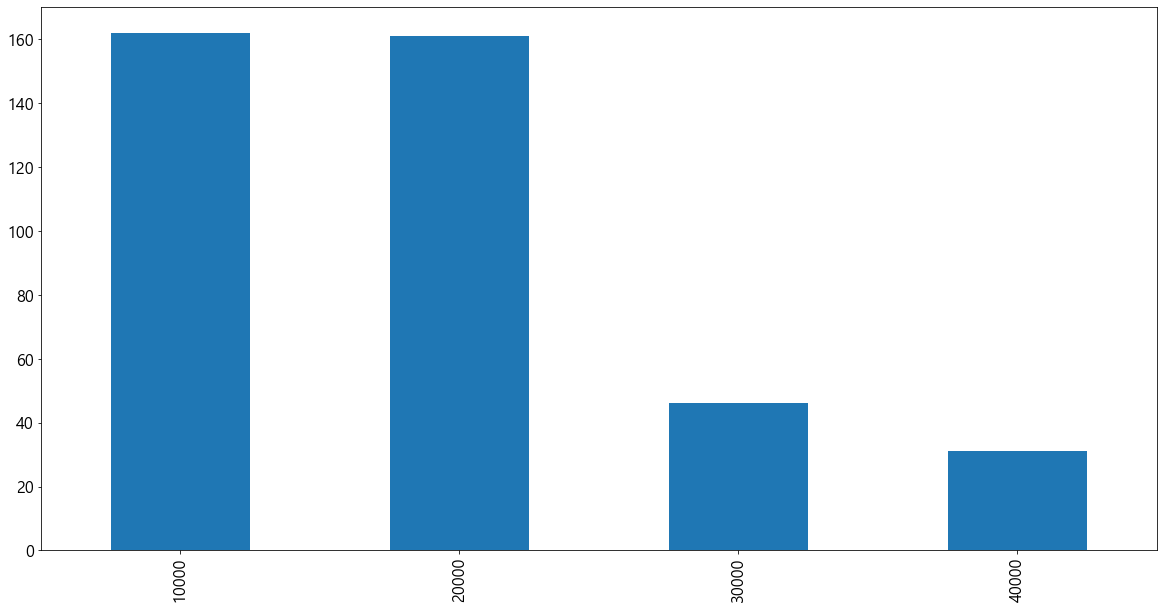

In [59]:
# 막대 그래프
# 칼럼의 값의 종류가 적을 경우(카테고리형 데이터)
# 컬럼에 저장되어 있는 값 종류별 양을 비교할 때.

a1 = matzip["Price"].value_counts()

a1.plot.bar()
plt.show()

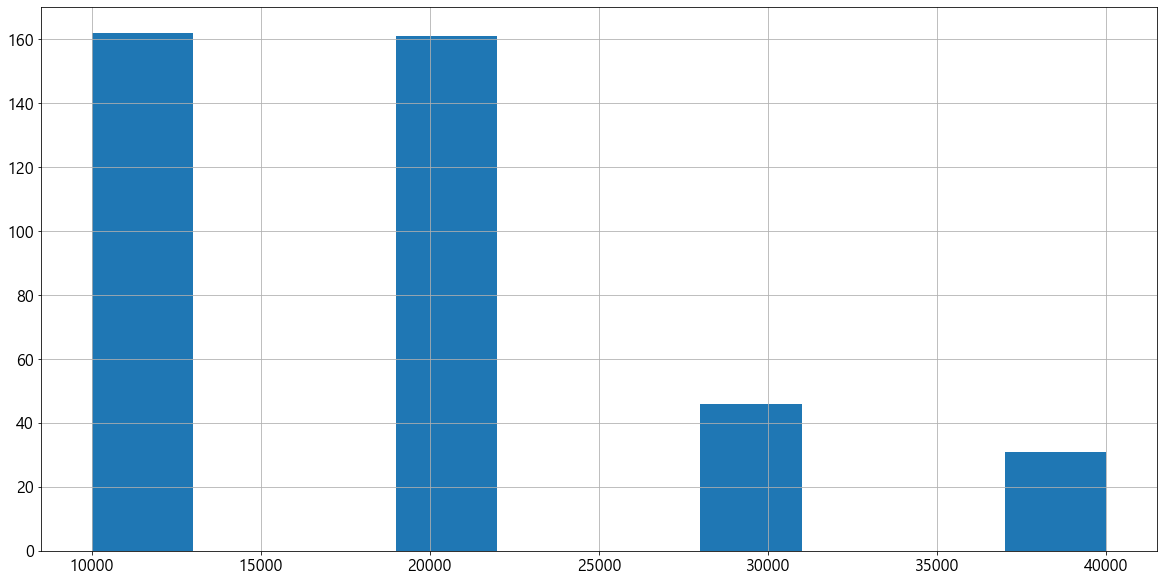

In [68]:
# 히스토그램
# 범위형 데이터(최소와 최대가 있는)..
# 중간값을 기준으로 좌측과 우측의 비율을 확인.
# 적은 값에서 큰값으로 흘러갈 경우 패턴을 보기 위해..(선그래프로 하기도 합니다)
matzip['Price'].plot.hist()
plt.show()


25000원 이하가 많고 이상은 수가 적다.

### 주차 공간과 평점간의 관계

In [69]:
# 시각화
# 숫자값이 아니기 때문에 오류가 발생한다.
# 또한, 연속성을 가진 숫자값 아니라면 오류가 발생하진 않지만 
# 히스토그램의 의미에 맞지 않기 때문에 비효율적이다.
matzip['Parking'].plot.hist()
plt.show()


TypeError: no numeric data to plot

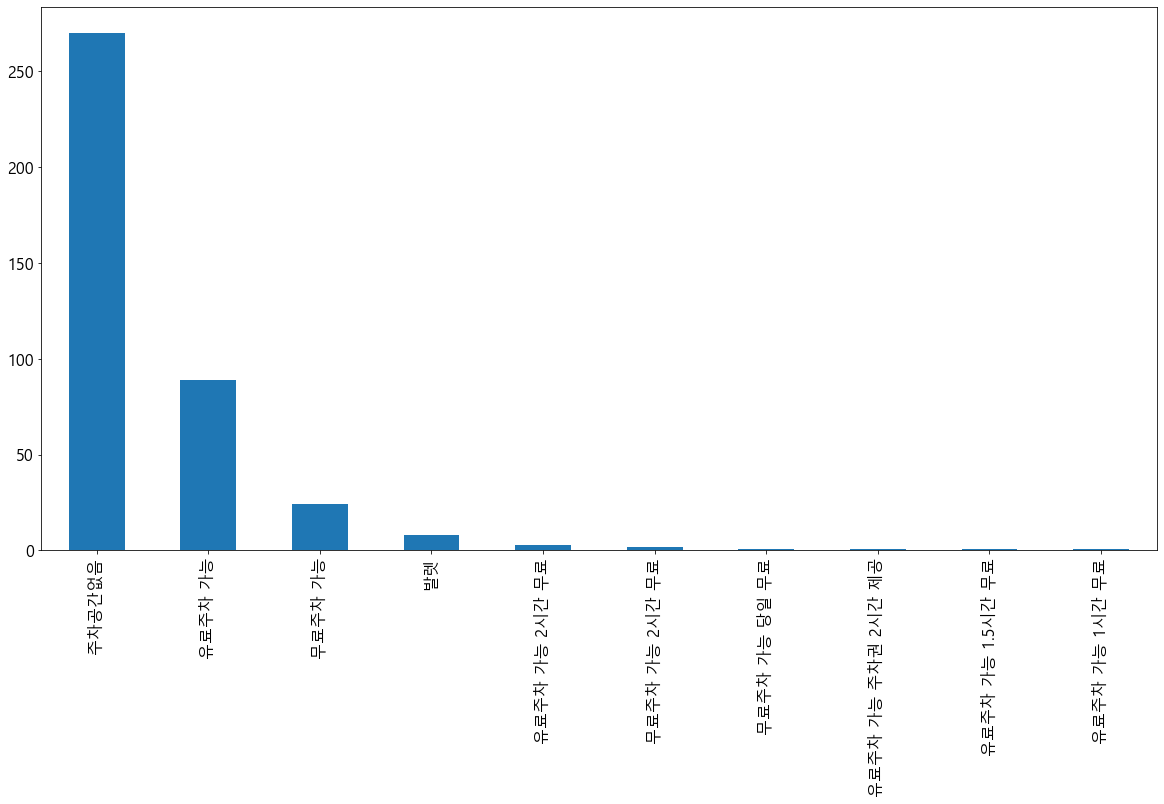

In [70]:
# 막대 그래프
a1 = matzip["Parking"].value_counts()

a1.plot.bar()
plt.show()

In [73]:
# Partking에 저장되어 있는 값의 목록을 출력한다.
a1 = matzip["Parking"].value_counts().index
a1

Index(['주차공간없음', '유료주차 가능', '무료주차 가능', '발렛', '유료주차 가능 2시간 무료',
       '무료주차 가능 2시간 무료', '무료주차 가능 당일 무료', '유료주차 가능 주차권 2시간 제공',
       '유료주차 가능 1.5시간 무료', '유료주차 가능 1시간 무료'],
      dtype='object')

주차공간없음 : 4.106000000000003


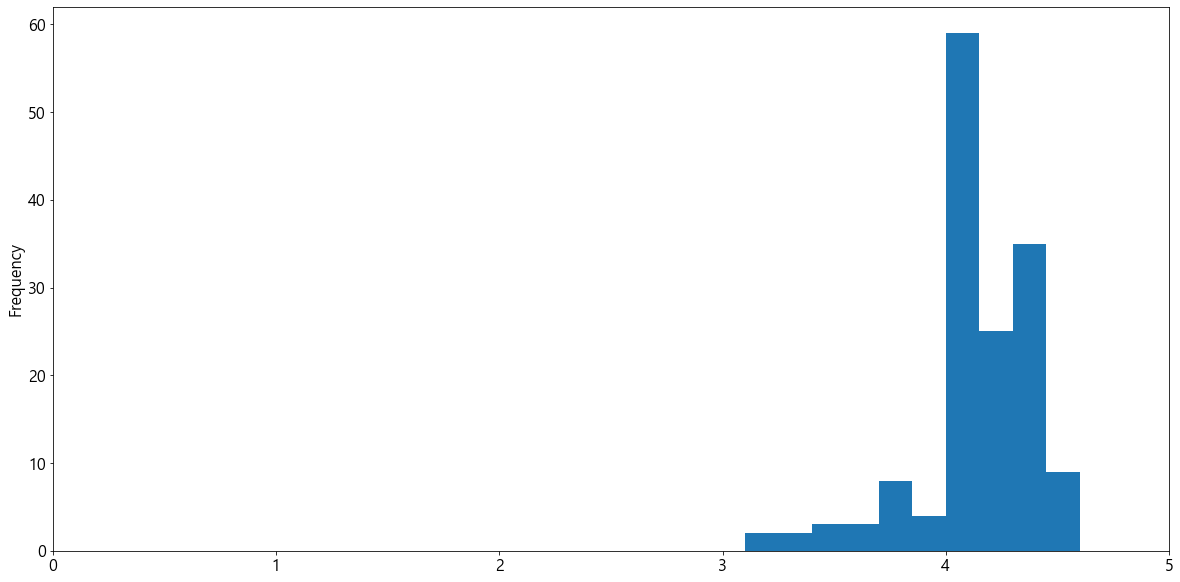

유료주차 가능 : 4.090163934426228


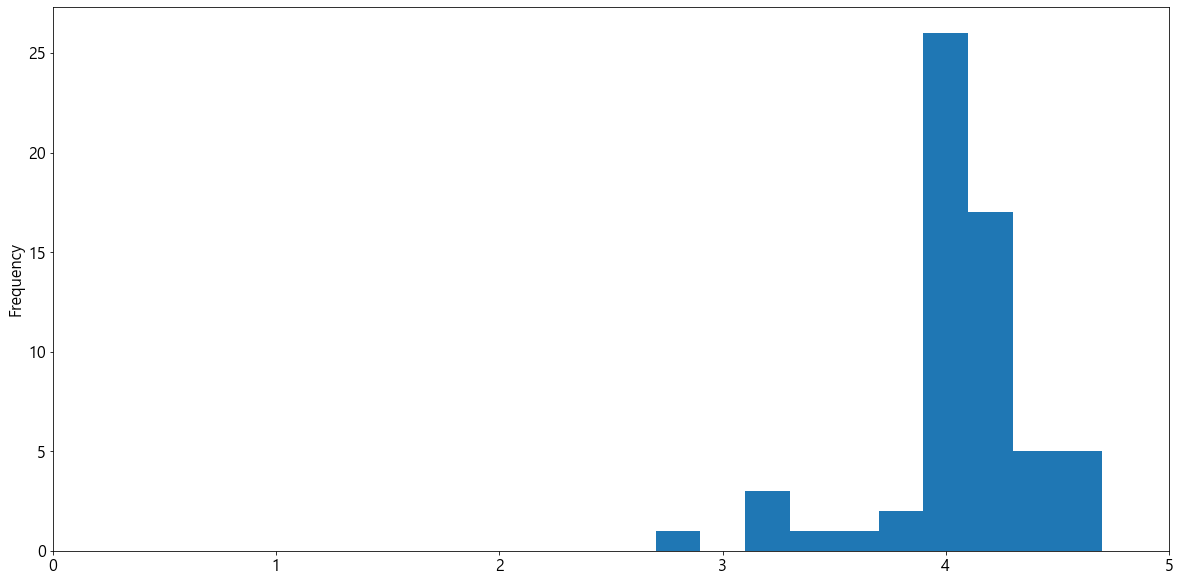

무료주차 가능 : 4.173684210526316


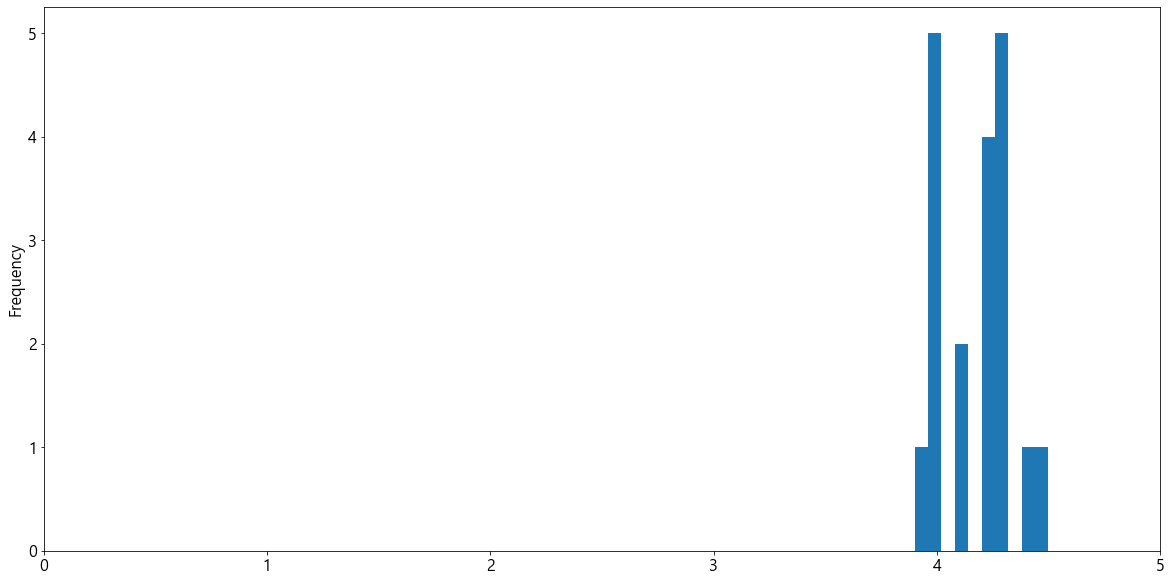

발렛 : 4.1875


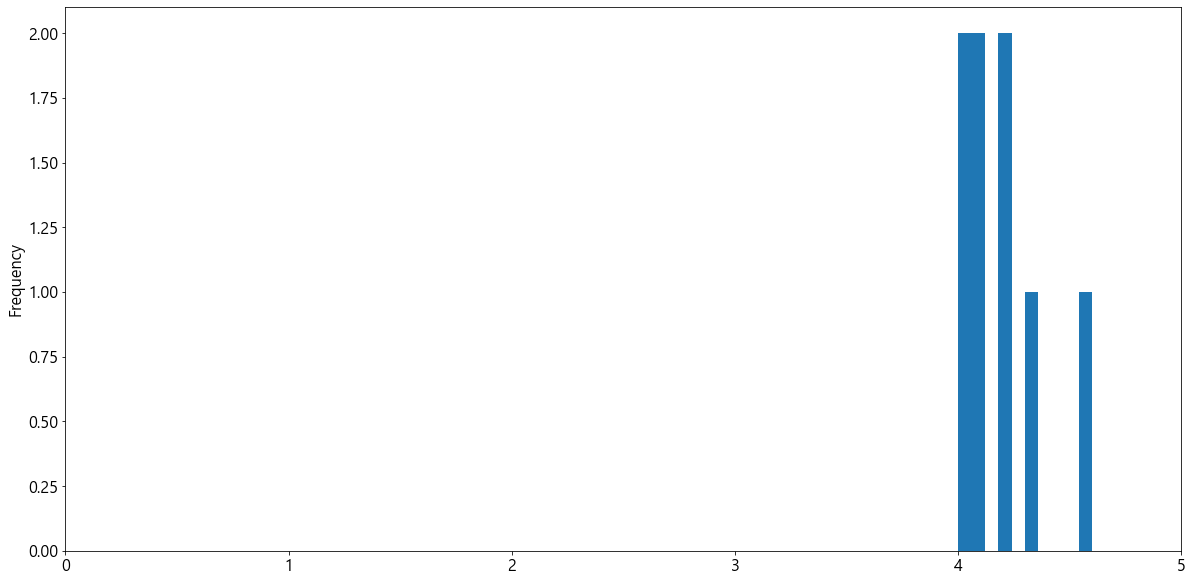

유료주차 가능 2시간 무료 : 4.066666666666666


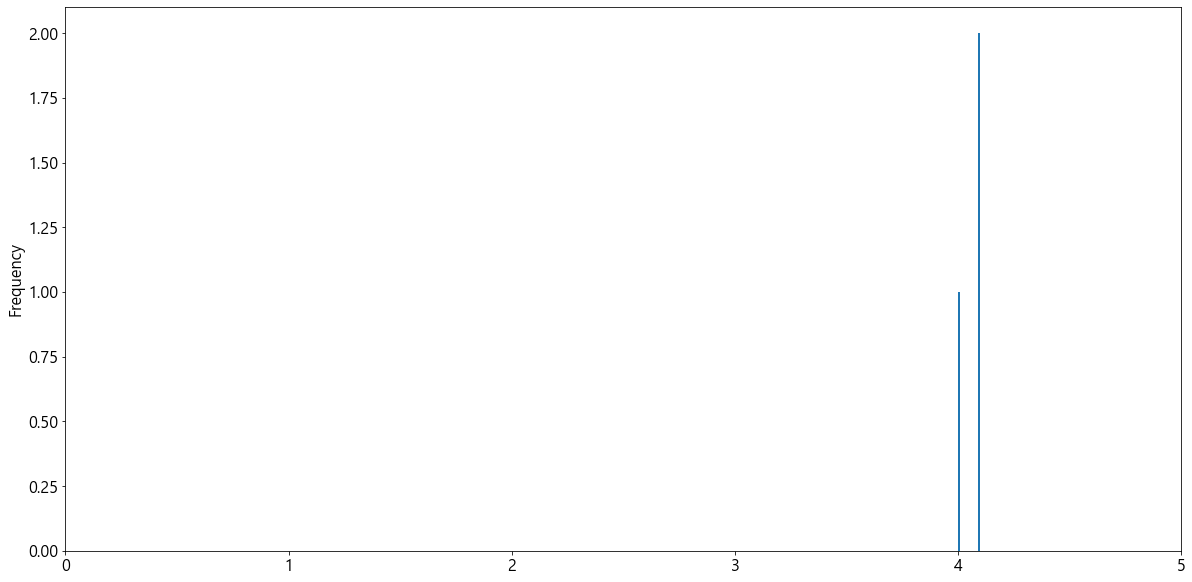

무료주차 가능 2시간 무료 : 4.7


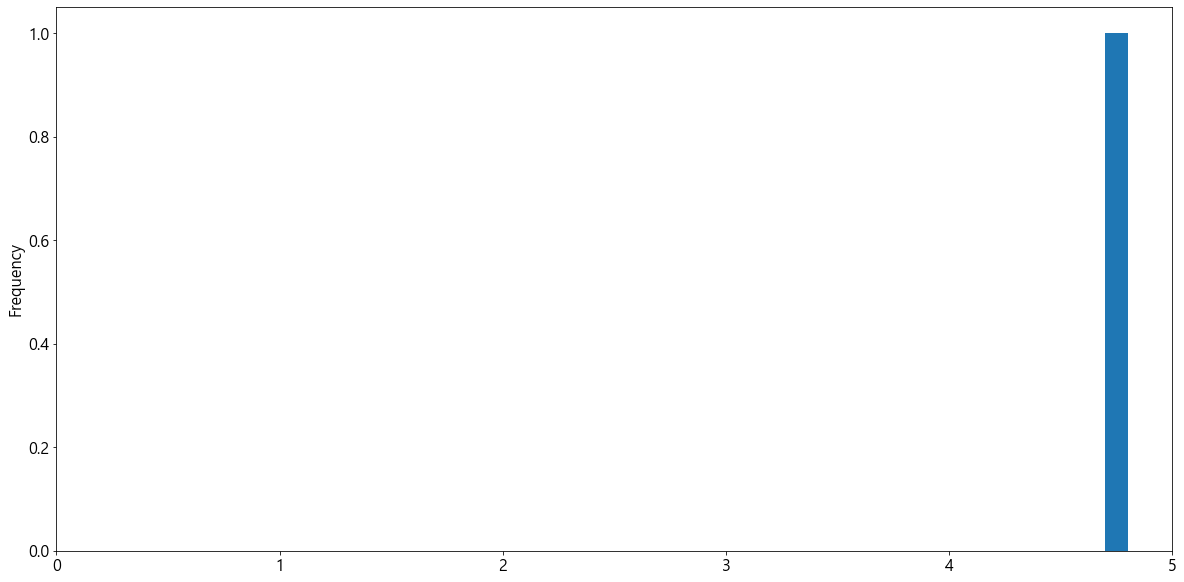

무료주차 가능 당일 무료 : nan


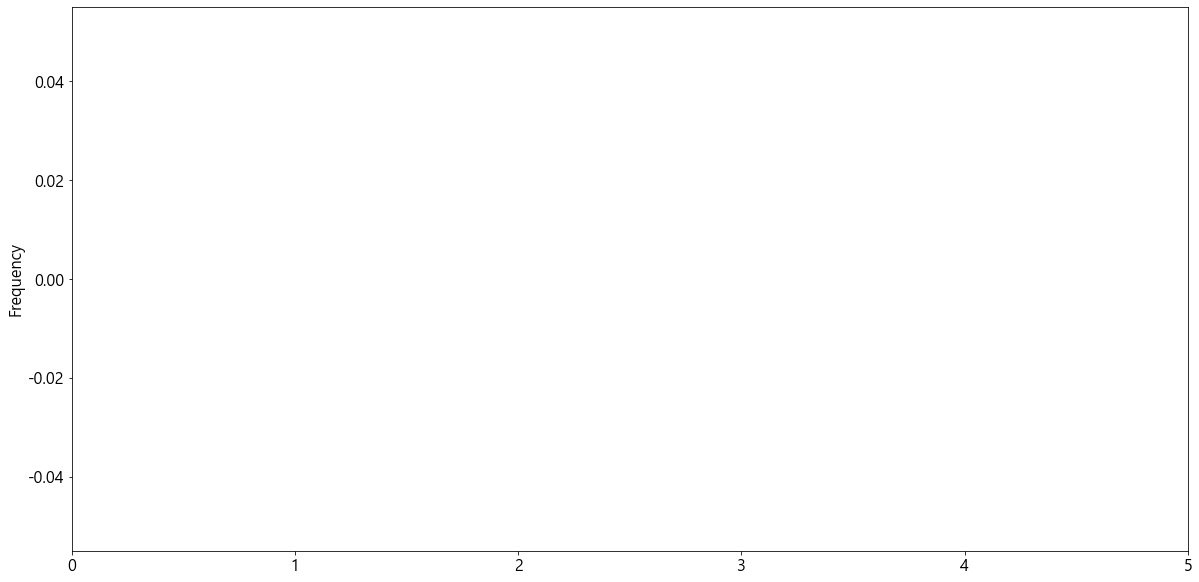

유료주차 가능 주차권 2시간 제공 : 4.1


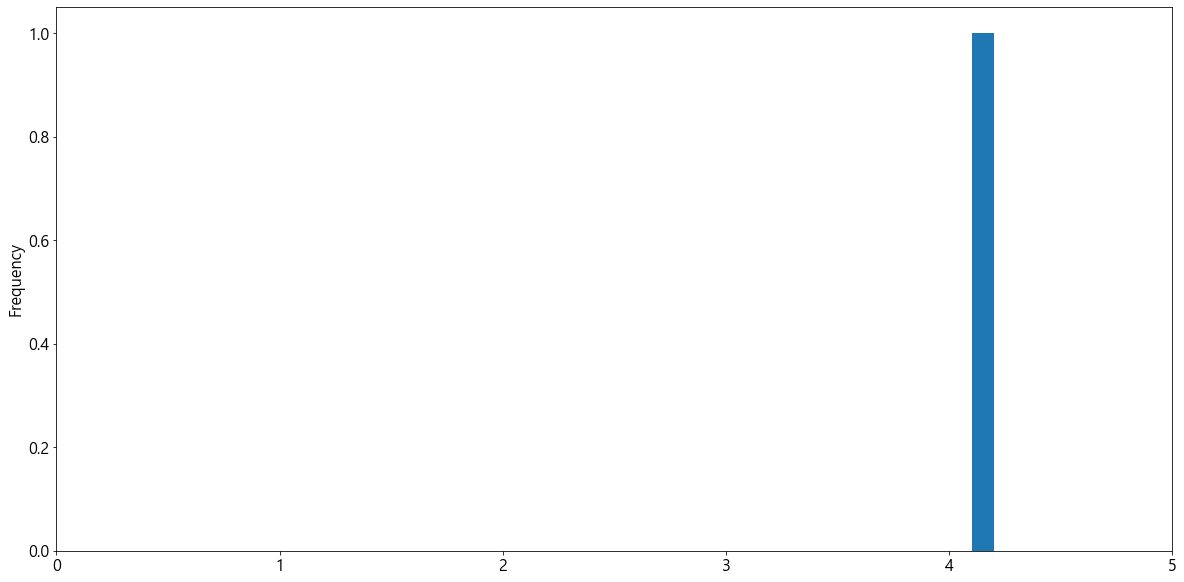

유료주차 가능 1.5시간 무료 : 4.4


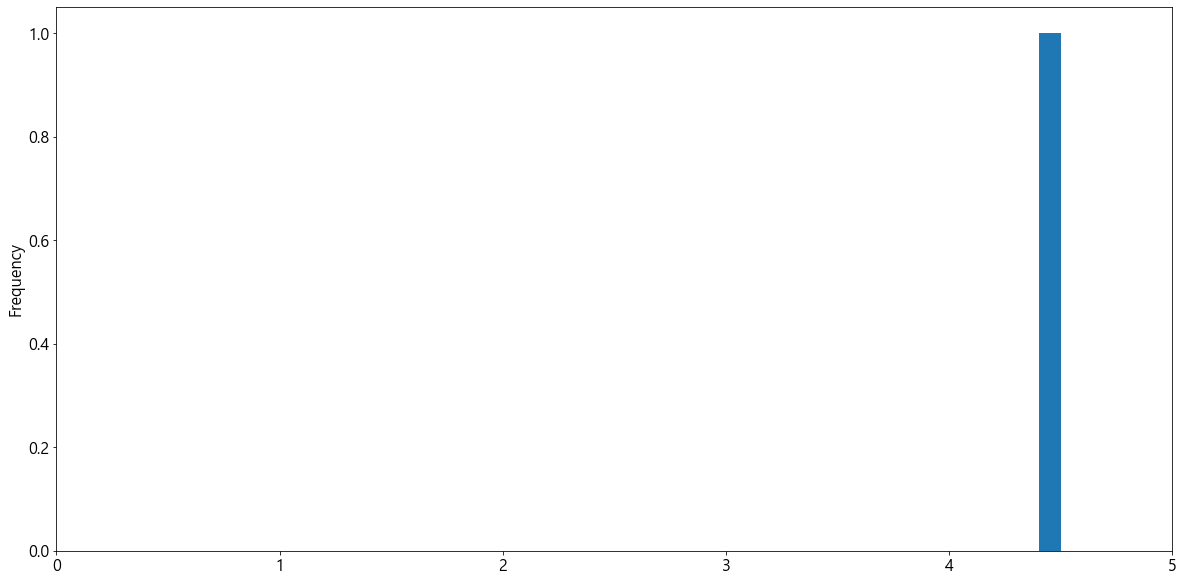

유료주차 가능 1시간 무료 : 4.4


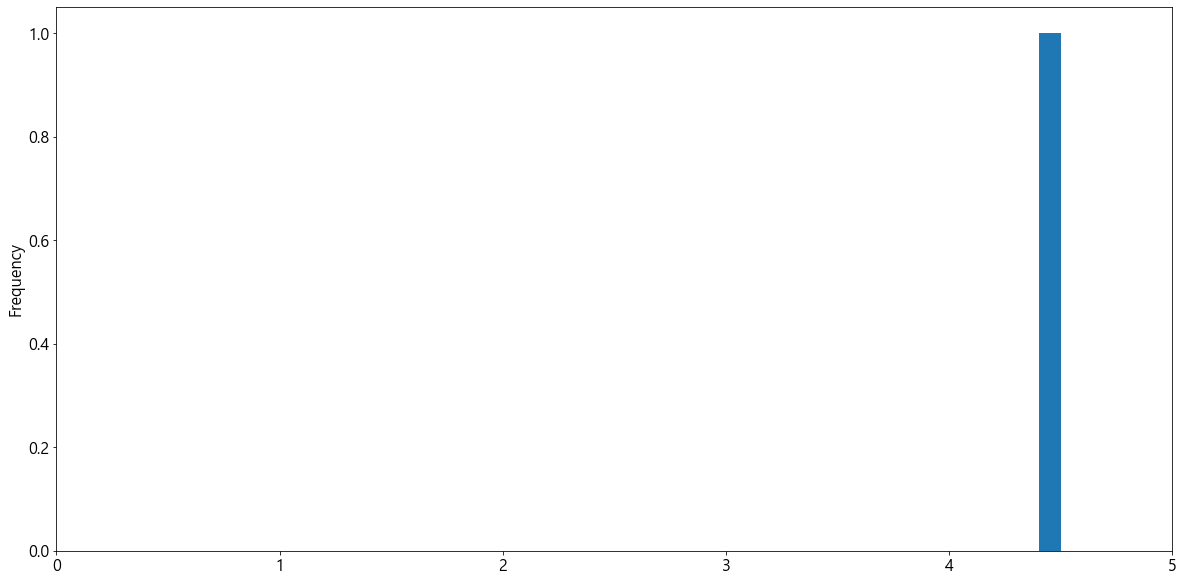

In [81]:
# 평점이 0.0인건 제거
idx2 = matzip.query("Rating == 0.0").index
matzip_temp = matzip.drop(idx2)

# Partking에 저장되어 있는 값만큼 반복
for value in a1 :
#     print(value)
    # 각 값에 해당하는 로우의 인덱스를 가져온다
    idx = matzip_temp.query(f"Parking == '{value}'").index
#     display(idx)
    
    # idx에 해당하는 데이터들 중 평점을 가져온다.
    rating = matzip_temp.loc[idx]["Rating"]
    
    # 평점 평균을 구한다.
    rating_avg = rating.mean()
    
    # 시각화
    print(f"{value} : {rating_avg}")
    
    rating.plot.hist()
    plt.xlim(0, 5)
    plt.show()

### 가격에 따른 별점 확인

In [85]:
# 가격에 저장되어 있는 값의 종류
a1 = matzip["Price"].value_counts().index

10000원 : 평균 평점 4.05


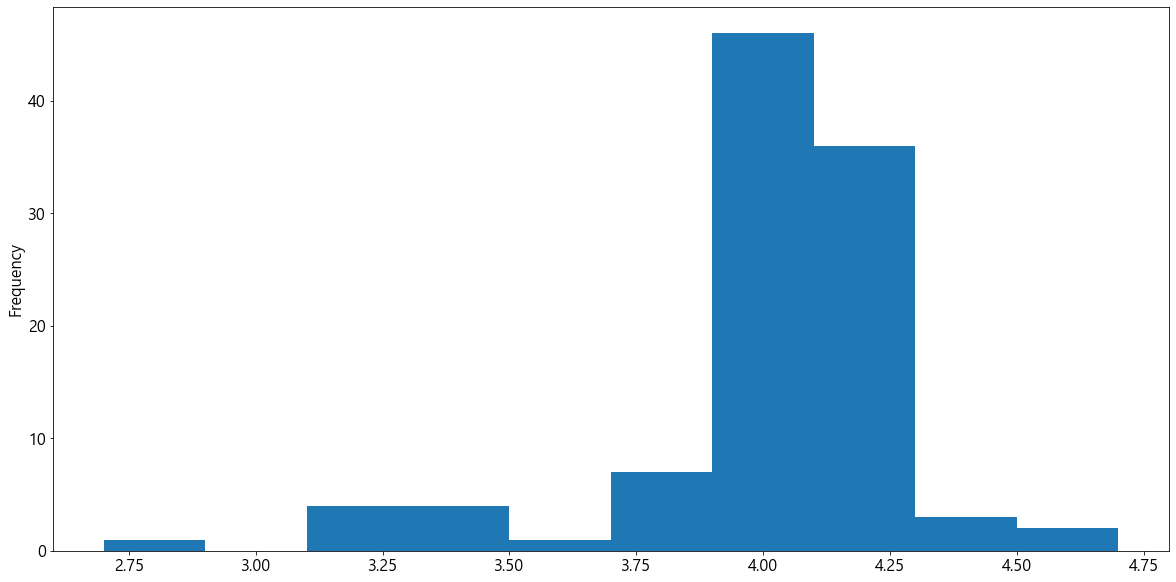

20000원 : 평균 평점 4.14


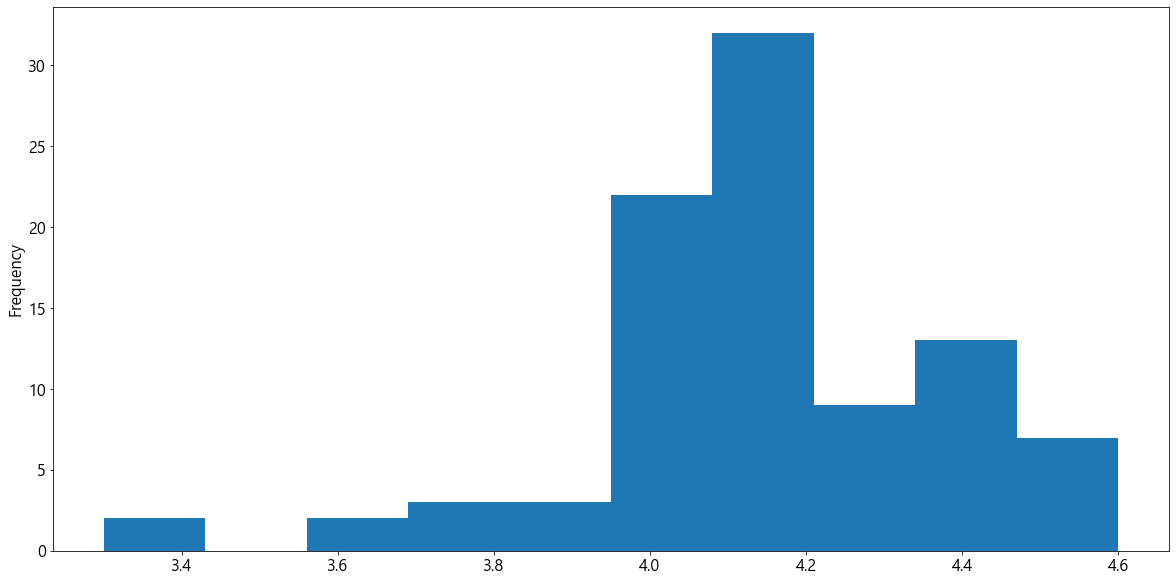

30000원 : 평균 평점 4.15


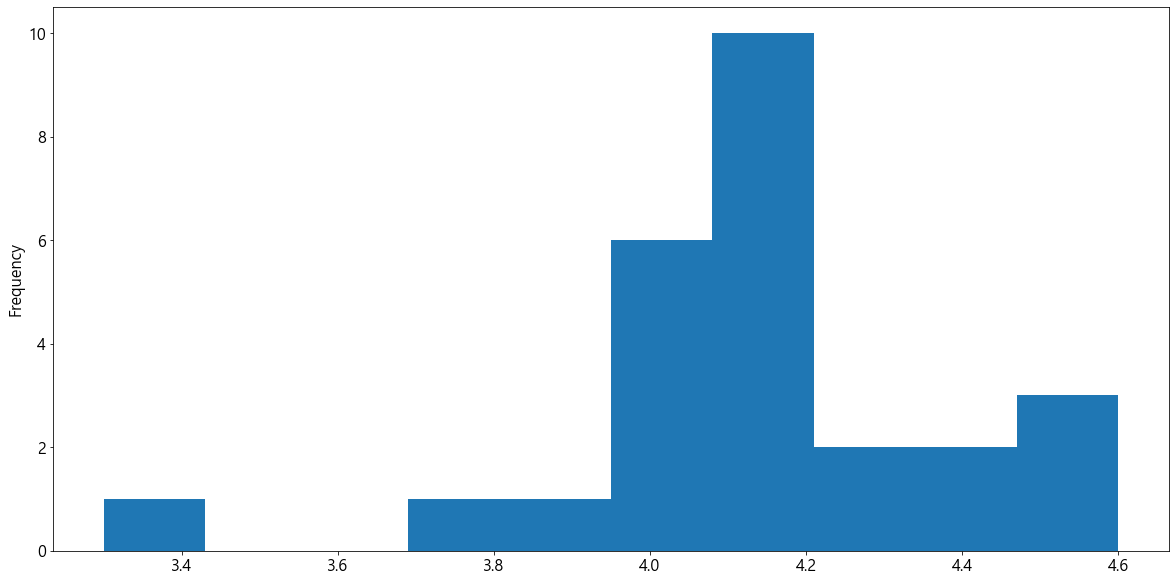

40000원 : 평균 평점 4.27


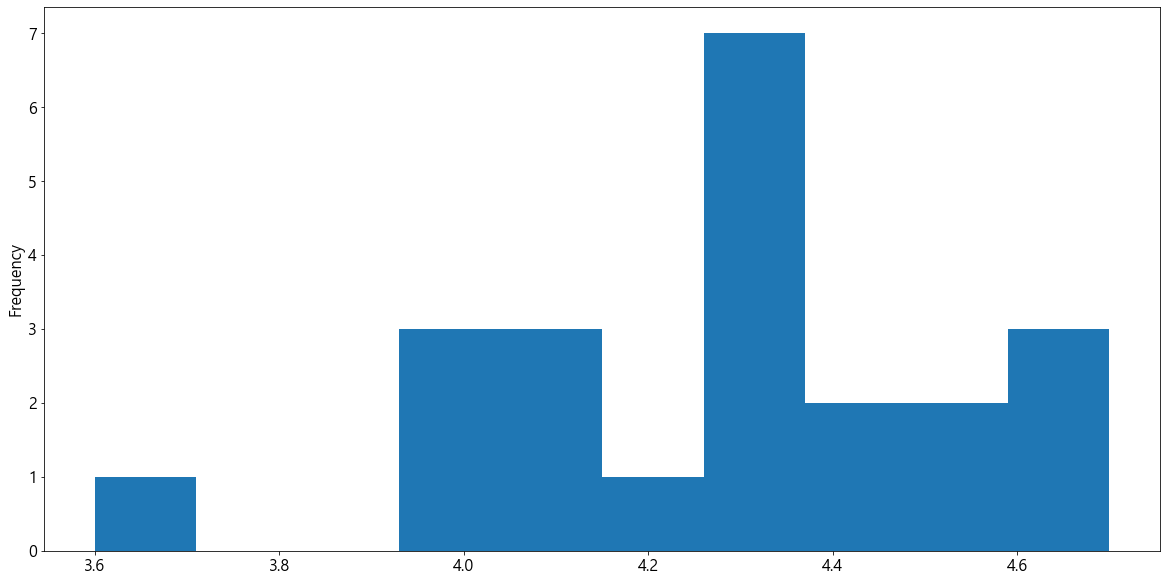

In [91]:
idx2 = matzip.query("Rating == 0.0").index
matzip_temp = matzip.drop(idx2)

for value in a1:
    idx = matzip_temp.query(f"Price == '{value}'").index
    rating = matzip_temp.loc[idx]["Rating"]
    rating_avg = rating.mean()
    print(f"{value}원 : 평균 평점 {rating_avg:.2f}")
    rating.plot.hist()
    plt.show()

In [ ]:
a, b = int(input())
a+b